## Basic Time Series Metrics and Resampling

This chapter dives deeper into the essential time series functionality made available through the pandas DataTimeIndex. It introduces resampling and how to compare different time series by normalizing their start points.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Compare the performance of several asset classes

You have seen in the video how you can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.5,70.47
2007-07-02,1519.43,402.96,650.5,71.11


SP500    1503.35
Bonds     402.15
Gold      648.50
Oil        70.47
Name: 2007-06-29 00:00:00, dtype: float64

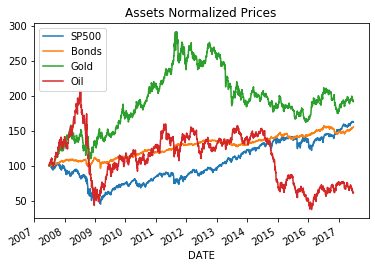

In [2]:
# Import 'asset_classes.csv', using .read_csv() 
# to parse dates in the 'DATE' column 
# and set this column as the index, then assign the result to prices
prices = pd.read_csv('asset_classes.csv', parse_dates=['DATE'], index_col='DATE')
display(prices.head(2))

# Select the first price for each series using .iloc[0] on prices
first_prices = prices.iloc[0]
display(first_prices)

# Create normalized
# Divide prices by first_prices, multiply by 100 and assign the result to normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot(title = 'Assets Normalized Prices')

### Comparing stock prices with a benchmark

You also learned in the video how to compare the performance of various stocks against a benchmark. Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:

|Company|	Stock Ticker|
|-------|----------------|
|Johnson & Johnson|	JNJ|
|Exxon Mobil|	XOM|
|JP Morgan Chase|	JPM|

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
JNJ     1762 non-null float64
JPM     1762 non-null float64
XOM     1762 non-null float64
DJIA    1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB
None


,JNJ,JPM,XOM,DJIA
date,,,,
2010-01-04,64.68,42.85,69.15,10583.96
2010-01-05,63.93,43.68,69.42,10572.02


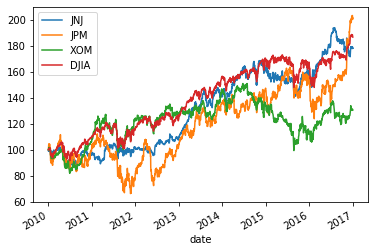

In [3]:
# Import stock prices and index here
# Use pd.read_csv() to import 'nyse.csv' and 'dow_jones.csv', 
# creating a DatetimeIndex for each from the 'date' column using parse_dates 
# and index_col, and assign the result to stocks and dow_jones, respectively.
stocks = pd.read_csv('nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
# Use pd.concat() along axis=1 to combine stocks and dow_jones and assign the result to data. 
data = pd.concat([stocks, dow_jones], axis=1).dropna()
print(data.info())
display(data.head(2))

# Normalize and plot your data here
# Divide data by the first value for each series, multiply by 100 and plot the result.
data.div(data.iloc[0]).mul(100).plot()

### Plot performance difference vs benchmark index

In the video, you learned how to calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

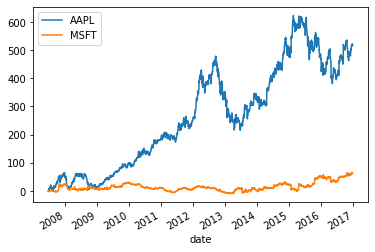

In [4]:
# Create tickers
tickers = ['AAPL', 'MSFT']

# Import stock data here
stocks = pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data by dividing by the first price, multiply by 100 and assign the output to normalized.
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()


### Convert monthly to weekly data

You have learned in the video how to use `.reindex()` to conform an existing time series to a `DateTimeIndex` at a different frequency.

Let's practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [11]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates using pd.date_range with start, end and frequency alias 'M'.
monthly_dates = pd.date_range(start, end, freq='M')

# Create and print the pd.Series monthly, 
# passing the list [1, 2] as the data argument, and using monthly_dates as index.
monthly = pd.Series(data=[1,2], index=monthly_dates)
display(monthly)

# Create weekly_dates using pd.date_range with start, end and frequency alias 'W'
weekly_dates = pd.date_range(start, end, freq='W')

# Print monthly, reindexed using weekly_dates
print('Unsampling Month => Week, no fill')
display(monthly.reindex(weekly_dates))
print('Unsampling Month => Week, back fill')
display(monthly.reindex(weekly_dates, method='bfill'))
print('Unsampling Month => Week, forward fill')
display(monthly.reindex(weekly_dates, method='ffill'))


2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64

Unsampling Month => Week, no fill


2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64

Unsampling Month => Week, back fill


2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64

Unsampling Month => Week, forward fill


2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64

### Create weekly from monthly unemployment data

The civilian US unemployment rate is reported monthly. You may need more frequent data, but that's no problem because you just learned how to upsample a time series.

You'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

,UNRATE
DATE,
2010-01-03,NaN
2010-01-10,NaN
2010-01-17,NaN
2010-01-24,NaN
2010-01-31,NaN


,UNRATE
DATE,
2010-01-03,9.8
2010-01-10,9.8
2010-01-17,9.8
2010-01-24,9.8
2010-01-31,9.8


,UNRATE
DATE,
2010-01-03,9.8
2010-01-10,9.8
2010-01-17,9.8
2010-01-24,9.8
2010-01-31,9.8


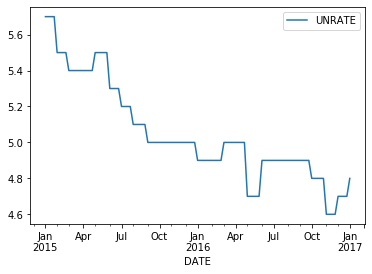

In [12]:
# Import data here
data = pd.read_csv('unrate.csv', parse_dates=['DATE'], index_col='DATE')

# Convert data to weekly frequency using .asfreq() with the alias 'W' 
# and show the first five rows
display(data.asfreq('W').head())

# Convert again to weekly frequency, adding the option 'bfill' 
# and show the first five rows.
display(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
display(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill['2015':].plot()


### Use interpolation to create weekly employment data

You have recently used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple `forward` or `backfill` methods.

Compare your previous approach to the new `.interpolate()` method that you learned about in this video.

Monthly


,UNRATE
DATE,
2016-09-01,4.9
2016-10-01,4.8
2016-11-01,4.6
2016-12-01,4.7
2017-01-01,4.8


Weekly


,UNRATE
2016-12-04,NaN
2016-12-11,NaN
2016-12-18,NaN
2016-12-25,NaN
2017-01-01,4.8


Weekly


,UNRATE,ffill,interpolated
2016-12-04,NaN,4.7,4.788571
2016-12-11,NaN,4.7,4.791429
2016-12-18,NaN,4.7,4.794286
2016-12-25,NaN,4.7,4.797143
2017-01-01,4.8,4.8,4.800000


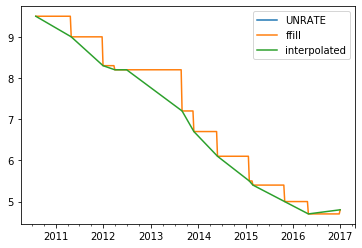

In [15]:
# Import data here
monthly = pd.read_csv('unrate.csv', parse_dates=['DATE'], index_col='DATE')

# Inspect data here
print('Monthly')
display(monthly.tail())

# Create a pd.date_range() with weekly dates, 
# using the .min() and .max() of the index of monthly as start and end, respectively, 
# and assign the result to weekly_dates
weekly_dates = pd.date_range(monthly.index.min(), monthly.index.max(), freq='W')

# Reindex monthly to weekly data - Apply .reindex() using weekly_dates to monthly and assign the output to weekly
weekly = monthly.reindex(weekly_dates)
print('Weekly')
display(weekly.tail())

# Create new columns 'ffill' and 'interpolated' by applying .ffill() and .interpolate() to weekly.UNRATE
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()
print('Weekly')
display(weekly.tail())

# Plot weekly
weekly.plot()


### Interpolate debt/GDP and compare to unemployment

Since you have learned how to interpolate time series, you can now apply this new skill to the quarterly debt/GDP series, and compare the result to the monthly unemployment rate.

            Debt/GDP  Unemployment
date                              
2010-01-01  87.00386           9.8
2010-02-01       NaN           9.8
2010-03-01       NaN           9.9
2010-04-01  88.67047           9.9
2010-05-01       NaN           9.6
             Debt/GDP  Unemployment
date                               
2010-01-01  87.003860           9.8
2010-02-01  87.559397           9.8
2010-03-01  88.114933           9.9
2010-04-01  88.670470           9.9
2010-05-01  89.135103           9.6


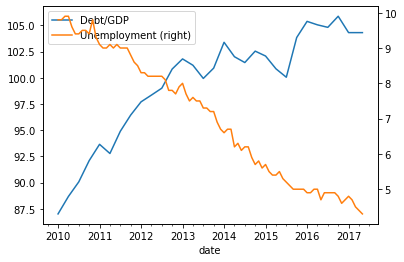

In [17]:
# Import & inspect data here
data = pd.read_csv('debt_unemployment.csv', index_col='date', parse_dates=['date'])
print(data.head())

# Apply .interpolate() to data and assign this to interpolated, then inspect the result.
interpolated = data.interpolate()
print(interpolated.head())

# Plot interpolated with 'Unemployment' on the secondary_y axis.
interpolated.plot(secondary_y='Unemployment')

### Compare weekly, monthly and annual ozone trends for NYC & LA

You have seen in the video how to downsample and aggregate time series on air quality.

First, you'll apply this new skill to ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
Los Angeles    5488 non-null float64
New York       6167 non-null float64
dtypes: float64(2)
memory usage: 147.4 KB
None


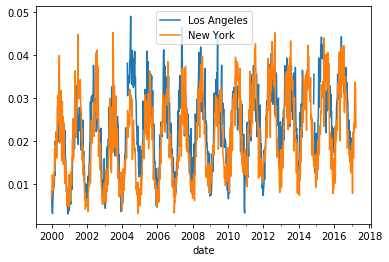

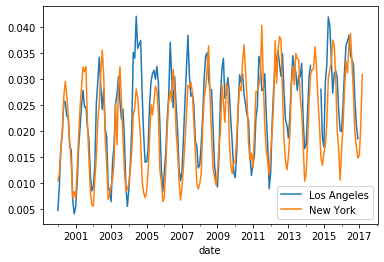

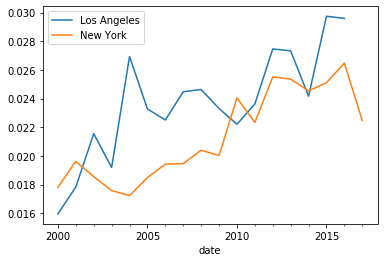

In [20]:
# Import and inspect data here
ozone = pd.read_csv('ozone_nyla.csv', parse_dates=['date'], index_col='date')
print(ozone.info())

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
#plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
#plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
#plt.show()


### Compare monthly average stock prices for Facebook and Google

Now, you'll apply your new resampling skills to daily stock price series for Facebook and Google for the 2015-2016 period to compare the trend of the monthly averages.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
FB      504 non-null float64
GOOG    504 non-null float64
dtypes: float64(2)
memory usage: 11.8 KB
None


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017880172E10>,
      dtype=object)

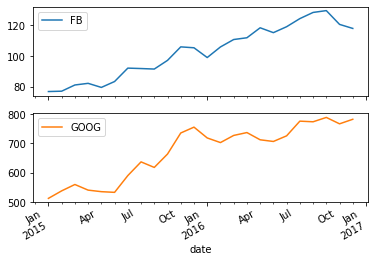

In [23]:
# Import and inspect data here
stocks = pd.read_csv('goog_fb.csv', parse_dates=['date'], index_col='date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True)

### Compare quarterly GDP growth rate and stock returns

With your new skill to downsample and aggregate time series, you can compare higher-frequency stock price series to lower-frequency economic time series.

As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) Dow Jones Industrial index of 30 large US stocks.

GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, you'll resample the stock index to quarter start frequency using the alias `'QS'`, and aggregating using the `.first()` observations.

,gdp_growth
date,
2007-01-01,0.2
2007-04-01,3.1


,djia
date,
2007-06-29,13408.62
2007-07-02,13535.43


,djia
date,
2007-04-01,13408.62
2007-07-01,13535.43


,djia
date,
2007-04-01,NaN
2007-07-01,0.945735


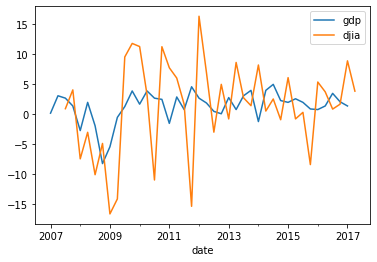

In [25]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date')
display(gdp_growth.head(2))

# Import and inspect djia here
djia = pd.read_csv('djia.csv', parse_dates=['date'], index_col='date')
display(djia.head(2))

# Resample djia using frequency alias 'QS', aggregate using .first(), and assign to djia_quarterly
djia_quarterly = djia.resample('QS').first()
display(djia_quarterly.head(2))

# Apply .pct_change() to djia_quarterly and .mul() by 100 to obtain djia_quarterly_return
djia_quarterly_return = djia_quarterly.pct_change().mul(100)
display(djia_quarterly_return.head(2))

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']

data.plot()

### Visualize monthly mean, median and standard deviation of S&P500 returns

You have also learned how to calculate several aggregate statistics from upsampled data.

Let's use this to explore how the monthly mean, median and standard deviation of daily S&P500 returns have trended over the last 10 years.

sp500


,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


Daily returns


date
2007-06-29         NaN
2007-07-02    0.010696
2007-07-03    0.003580
2007-07-05    0.000348
2007-07-06    0.003304
Name: SP500, dtype: float64

Monthly aggregates


,mean,median,std
date,,,
2007-06-30,NaN,NaN,NaN
2007-07-31,-0.001490,0.000921,0.010908
2007-08-31,0.000668,0.001086,0.015261
2007-09-30,0.001900,0.000202,0.010000
2007-10-31,0.000676,-0.000265,0.008719


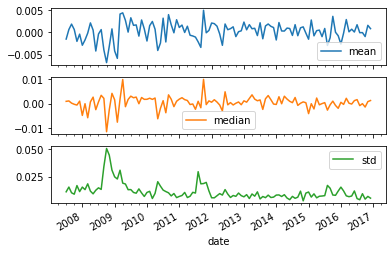

In [32]:
# Import data here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')
print("sp500")
display(sp500.head())

# Convert sp500 to a pd.Series() using .squeeze(), and apply .pct_change() to calculate daily_returns
daily_returns = sp500.squeeze().pct_change()
print("Daily returns")
display(daily_returns.head())

# .resample() daily_returns to month-end frequency (alias: 'M'), 
# and apply .agg() to calculate 'mean', 'median', and 'std'. 
# Assign the result to stats.
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])
print("Monthly aggregates")
display(stats.head())

# Plot stats here
stats.plot(subplots=True)
plt.show()
